# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [69]:
import pandas as pd

baby_names_df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')
print(baby_names_df.dtypes)
print(baby_names_df.shape)
print(baby_names_df.head(10))

baby_names_df.drop(columns=['Unnamed: 0', 'Id'], axis=1, inplace=True)
print(baby_names_df.groupby('Gender')['Count'].sum())


Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
(1016395, 7)
   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28
Gender
F    16380293
M    19041199
Name: Count, dtype: int64


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

Krok 8: Jak wiele różnych imion występuje w zbiorze?

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64


([<matplotlib.patches.Wedge at 0x7f7634c5c940>,
 [Text(-0.4433783980246506, 1.1350147897872276, 'Jacob'),
  Text(-1.0593615398627751, 0.5739785786468883, 'Emma'),
  Text(-1.1889395493804071, -0.19389518902268077, 'Michael'),
  Text(-0.827736272838351, -0.8717805906545891, 'Ethan'),
  Text(-0.1490925560556517, -1.1906590256157947, 'Isabella'),
  Text(0.5661980604934397, -1.0541544743161064, 'William'),
  Text(1.058207129779341, -0.5519240725372039, 'Joshua'),
  Text(1.1866769168360065, 0.12687821161812027, 'Sophia'),
  Text(0.9176863870820857, 0.7629842007607006, 'Daniel'),
  Text(0.3431920382443903, 1.142455956637748, 'Emily')],
 [Text(-0.2614484189099744, 0.6692879570844794, '11.85%'),
  Text(-0.6197429742721509, 0.335786394081479, '10.49%'),
  Text(-0.6954587678693912, -0.11341712816584215, '10.46%'),
  Text(-0.4834610897983971, -0.5091863293337483, '10.21%'),
  Text(-0.08696844676523335, -0.6945334416706888, '10.00%'),
  Text(0.32960942396701487, -0.613670857065059, '9.66%'),
  Text

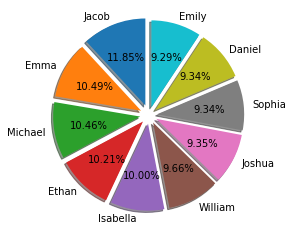

In [74]:
grouped_by_names = baby_names_df.groupby('Name')['Count'].sum().sort_values(ascending=False)
print(grouped_by_names.head(10))

import matplotlib.pyplot as plt

top_all_gender_names = pd.DataFrame({'Name': grouped_by_names.index, 'Count': grouped_by_names.values}).head(10)
plt.pie(
    top_all_gender_names['Count'].values,
    explode=top_all_gender_names['Count'].values / top_all_gender_names['Count'].sum(),
    labels=top_all_gender_names['Name'],
    autopct='%1.2f%%',
    startangle=90,
    shadow=True
)

([<matplotlib.patches.Wedge at 0x7f76349df370>,
 [Text(-0.4664402472063219, 1.132077135060834, 'Emma'),
  Text(-1.1144040482778101, 0.4930473965537533, 'Isabella'),
  Text(-1.1552115944451231, -0.36294764427834275, 'Sophia'),
  Text(-0.6549526842757715, -1.0176368750149802, 'Emily'),
  Text(0.14034367518890964, -1.2007080950024436, 'Olivia'),
  Text(0.8271132251690784, -0.865165459373095, 'Ava'),
  Text(1.172691674811307, -0.23777555563066932, 'Madison'),
  Text(1.1022041185195703, 0.44983578560098214, 'Abigail'),
  Text(0.7313581506507747, 0.9152976330975854, 'Elizabeth'),
  Text(0.2609140806892302, 1.1420684989807888, 'Mia')],
 [Text(-0.2759637994977765, 0.6697799115472877, '12.44%'),
  Text(-0.6571573152923638, 0.29074706246076154, '11.86%'),
  Text(-0.6782007000423486, -0.2130790130673212, '11.09%'),
  Text(-0.38435246063199513, -0.5971900662936649, '11.02%'),
  Text(0.08229679922419995, -0.7040889650942836, '10.89%'),
  Text(0.4815971015318524, -0.5037534945646436, '9.69%'),
  Tex

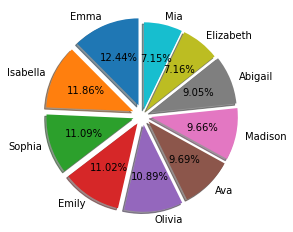

In [73]:
female_names = baby_names_df[baby_names_df['Gender'] == 'F']
female_names = female_names.groupby('Name')['Count']\
    .sum()\
    .sort_values(ascending=False)

top_female_gender_names = pd.DataFrame({'Name': female_names.index, 'Count': female_names.values}).head(10)

plt.pie(
    top_female_gender_names['Count'].values,
    explode=top_female_gender_names['Count'].values / top_female_gender_names['Count'].sum(),
    labels=top_female_gender_names['Name'],
    autopct='%1.2f%%',
    startangle=90,
    shadow=True
)

([<matplotlib.patches.Wedge at 0x7f7634870d00>,
 [Text(-0.4598324419271753, 1.1329657857784254, 'Jacob'),
  Text(-1.0830575028737353, 0.5357579608245002, 'Michael'),
  Text(-1.1784618238516942, -0.2551134290199272, 'Ethan'),
  Text(-0.7832508180564425, -0.9091521310174218, 'William'),
  Text(-0.1109179915003828, -1.1916535779706559, 'Joshua'),
  Text(0.5896463978769085, -1.0413873071364745, 'Daniel'),
  Text(1.0732640134934808, -0.5245154043097451, 'Alexander'),
  Text(1.1825014520665558, 0.16269447410884277, 'Matthew'),
  Text(0.89824696435619, 0.7817720631642132, 'Noah'),
  Text(0.3343766745619442, 1.1426962139655412, 'Anthony')],
 [Text(-0.271796579273049, 0.6696705080602962, '12.27%'),
  Text(-0.6348928159036795, 0.3140635464766595, '10.83%'),
  Text(-0.6897813845714049, -0.14932388197096982, '10.58%'),
  Text(-0.45690077983432187, -0.5303439307993951, '10.00%'),
  Text(-0.06457876484697017, -0.6938055328071103, '9.68%'),
  Text(0.3432897377604342, -0.6062914602058748, '9.67%'),
  

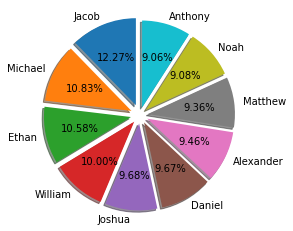

In [77]:
male_names = baby_names_df[baby_names_df['Gender'] == 'M']
male_names = male_names.groupby('Name')['Count']\
    .sum()\
    .sort_values(ascending=False)

top_male_gender_names = pd.DataFrame({'Name': male_names.index, 'Count': male_names.values}).head(10)

plt.pie(
    top_male_gender_names['Count'].values,
    explode=top_male_gender_names['Count'].values / top_male_gender_names['Count'].sum(),
    labels=top_male_gender_names['Name'],
    autopct='%1.2f%%',
    startangle=90,
    shadow=True
)

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [83]:
import numpy as np

np.random.choice(baby_names_df['Name'].values)

'Elaine'

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [90]:
all_gender_names = pd.DataFrame({'Name': grouped_by_names.index, 'Count': grouped_by_names.values})

print(all_gender_names['Name'][0])
print(all_gender_names.aggregate(['mean', 'median', 'std']))

Jacob
               Count
mean     2008.932169
median     49.000000
std     11006.069468


,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

occupation_df = pd.read_csv('lab12_files/ocupation.csv', delimiter='|')
print(occupation_df.head(25))
print(occupation_df.tail(10))
print(len(occupation_df))
print(len(occupation_df.columns))
print(occupation_df.columns.values)

    user_id  age gender     occupation zip_code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329
11       12   28      F          other    06405
12       13   47      M       educator    29206
13       14   45      M      scientist    55106
14       15   49      F       educator    97301
15       16   21      M  entertainment    10309
16       17   30      M     programmer    06355
17       18   35      F          other    37212
18       19   40      M      librarian    02138
19       20   42      F      homemaker  

Krok 6: Ile różnych zawodów jest w zbiorze?

In [108]:
occupation_df['occupation'].drop_duplicates().count()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

([<matplotlib.patches.Wedge at 0x7f763d34a6a0>,
 [Text(0.9469053741647211, 0.7242915727496213, 'student'),
  Text(-0.10934324863173969, 1.2840059238185397, 'other'),
  Text(-0.8868124266824181, 0.9495442382027034, 'educator'),
  Text(-1.2785407168086749, 0.3127001719902619, 'administrator'),
  Text(-1.2887694340886797, -0.3243175466151013, 'engineer'),
  Text(-1.0260887923169892, -0.8462091929547995, 'programmer'),
  Text(-0.6350788093155911, -1.1866626499217987, 'librarian'),
  Text(-0.23087623145455344, -1.3324253260231202, 'writer'),
  Text(0.11591174582736524, -1.3611392632583352, 'executive'),
  Text(0.39726437090377476, -1.308134185471812, 'scientist'),
  Text(0.6465874861311112, -1.208166936833398, 'artist'),
  Text(0.8565639095284725, -1.0709567640725641, 'technician'),
  Text(1.0321602856153964, -0.9045467995893819, 'marketing'),
  Text(1.1603385031230682, -0.7486871596694452, 'entertainment'),
  Text(1.2394264253879386, -0.6136791230610041, 'healthcare'),
  Text(1.29645826105

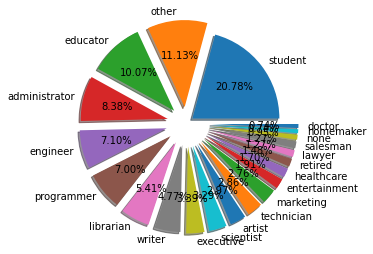

In [119]:
occupation_counts = occupation_df['occupation'].value_counts()
occupation_counts_df = pd.DataFrame({
    'Occupation': occupation_counts.index,
    'Amount': occupation_counts.values
})

plt.pie(
    occupation_counts_df['Amount'].values,
    labels=occupation_counts_df['Occupation'].values,
    explode=0.3-(occupation_counts_df['Amount'].values / occupation_counts_df['Amount'].sum()),
    shadow=True,
    autopct="%1.2f%%"
)

([<matplotlib.patches.Wedge at 0x7f763bfde970>,
 [Text(0.9469053741647211, 0.7242915727496213, 'student'),
  Text(-0.3833970109217417, 1.1511963921038828, 'other'),
  Text(-1.2259794353836464, 0.39699065787350674, 'other'),
  Text(-1.2190833479125176, -0.4493398839016174, 'educator'),
  Text(-0.7839091191094409, -1.0573241012468408, 'administrator'),
  Text(-0.200675295267774, -1.3137115174774432, 'engineer'),
  Text(0.38223730910001213, -1.2739006427079518, 'programmer'),
  Text(0.8476518703006268, -1.0454566684167181, 'librarian'),
  Text(1.1387160812795738, -0.729374231731397, 'writer'),
  Text(1.2996269771857172, -0.4208388610564698, 'executive'),
  Text(1.3598418151027052, -0.14094064526513572, 'scientist')],
 [Text(0.549764399321574, 0.4205169093877226, '20.78%'),
  Text(-0.2254074193734099, 0.6768133306836934, '18.66%'),
  Text(-0.7502969931655841, 0.24295749856857055, '11.13%'),
  Text(-0.7499372505073983, -0.2764181117341242, '10.07%'),
  Text(-0.48612217932527924, -0.65567383

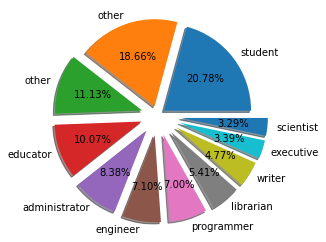

In [139]:
occupation_counts = occupation_df['occupation'].value_counts()
occupation_counts_df = pd.DataFrame({
    'Occupation': occupation_counts.index,
    'Amount': occupation_counts.values
}).sort_values('Amount', ascending=False)

top_occupations = occupation_counts_df.head(10)
top_occupations = top_occupations.append(
    pd.DataFrame({
        'Occupation': 'other',
        'Amount': occupation_counts_df['Amount'].iloc[10:].sum(axis=0)
    }, index=[0]),
).sort_values('Amount', ascending=False)

plt.pie(
    top_occupations['Amount'].values,
    labels=top_occupations['Occupation'].values,
    explode=0.3-(top_occupations['Amount'].values / top_occupations['Amount'].sum()),
    shadow=True,
    autopct="%1.2f%%"
)

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.